# Prosper loan data exploration
## by Krishan Singh

## Investigation Overview

> In this investigation, I wanted to look at the factors that influence the APR offered to the borrowers on Prosper's P2P lending platform. 

## Dataset Overview

> The dataset represents the loans made by a peer-to-peer lending based compny called Prosper . The dataset has 113937 records with 81 columns. There are a set of columns that describe the loan, for e.g. Terms, BorrowerAPR, LoanStatus. Then, there are attributes related to the credit-worthiness of the borrower, for e.g. ProsperScore, StatedMonthlyIncome, and Employmentstatus. .

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv')

In [9]:
#creating a subset of columns that will be relevant to my analysis 
relevant_cols = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore','EmploymentStatus','StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio','IncomeRange']
loan_sub_df = loan_df[relevant_cols]

#converting IncomeRange into ordered categorical attribute
ranges = ["$0", "$1-24,999", "$25,000-49,999","$50,000-74,999", "$75,000-99,999","$100,000+"]
levels = pd.api.types.CategoricalDtype(categories=ranges,ordered = True)
loan_sub_df['IncomeRange'] = loan_sub_df['IncomeRange'].astype(levels);

#converting Employment Status into categorical attribute
loan_sub_df['EmploymentStatus'] = loan_sub_df['EmploymentStatus'].astype('category')



## Distribution of APR

> The graph seems to be multi-modal with peaks between 0.1 and 0.3, followed by the biggest spike at .36%, which seems to be the most frequent APR offered to customers 

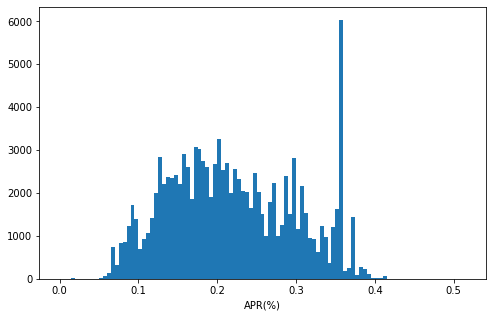

In [10]:
#plotting a histogram for APR to understand how the rates are distributed across the population

bins = np.arange(0, loan_sub_df['BorrowerAPR'].max()+0.005, 0.005)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sub_df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('APR(%)')
plt.show()

## Loan amount vs Borrower's APR

> Plotting Loan amount against borrower's APR clearly shows a negative correlation between the two. Also, there is more variability in APR for small loan amount, but it varies between a much smaller range at higher loan amount

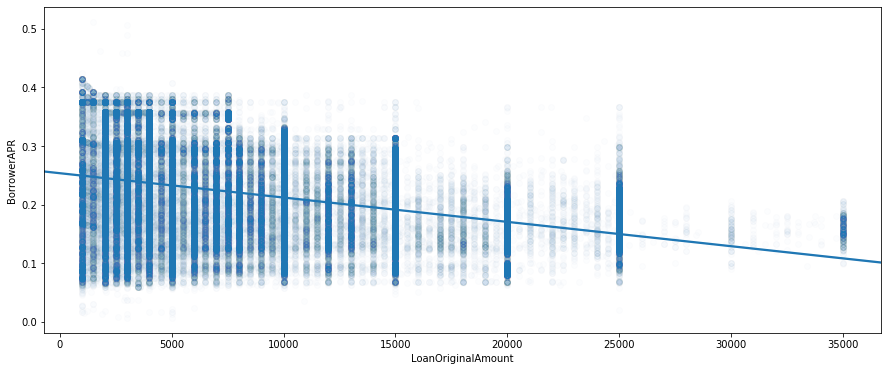

In [12]:
plt.figure(figsize = [15, 6])
sb.regplot(data = loan_sub_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

## Prosper score vs APR
> We can clearly see the affect of Prosper Score on the APR offered to the customers. Customers with high score are considered less risky, hence offerred a lower APR



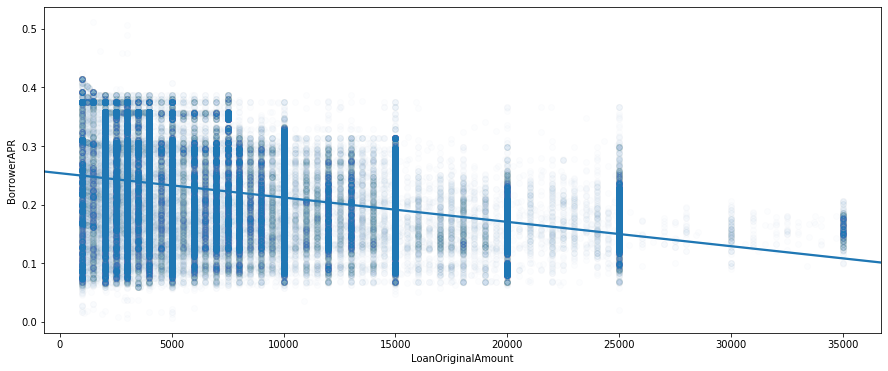

In [13]:
plt.figure(figsize = [15, 6])
sb.regplot(data = loan_sub_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

## APR by Original loan amount for different Prosper credit scores
> As shown earlier there is a negative correlation between the original loan amount and the APR offerred to the borrower. The graph below examines whether the relationship holds for different prosper credit scores. We can see that for scores of 10 and 11, the relationship turns into a positive correlation. This could be due to the size of the dataset where the creddit score is greater than 10 (5.5% of the complete dataset). This is counterintutive and should be further examined.

<Figure size 1080x1440 with 0 Axes>

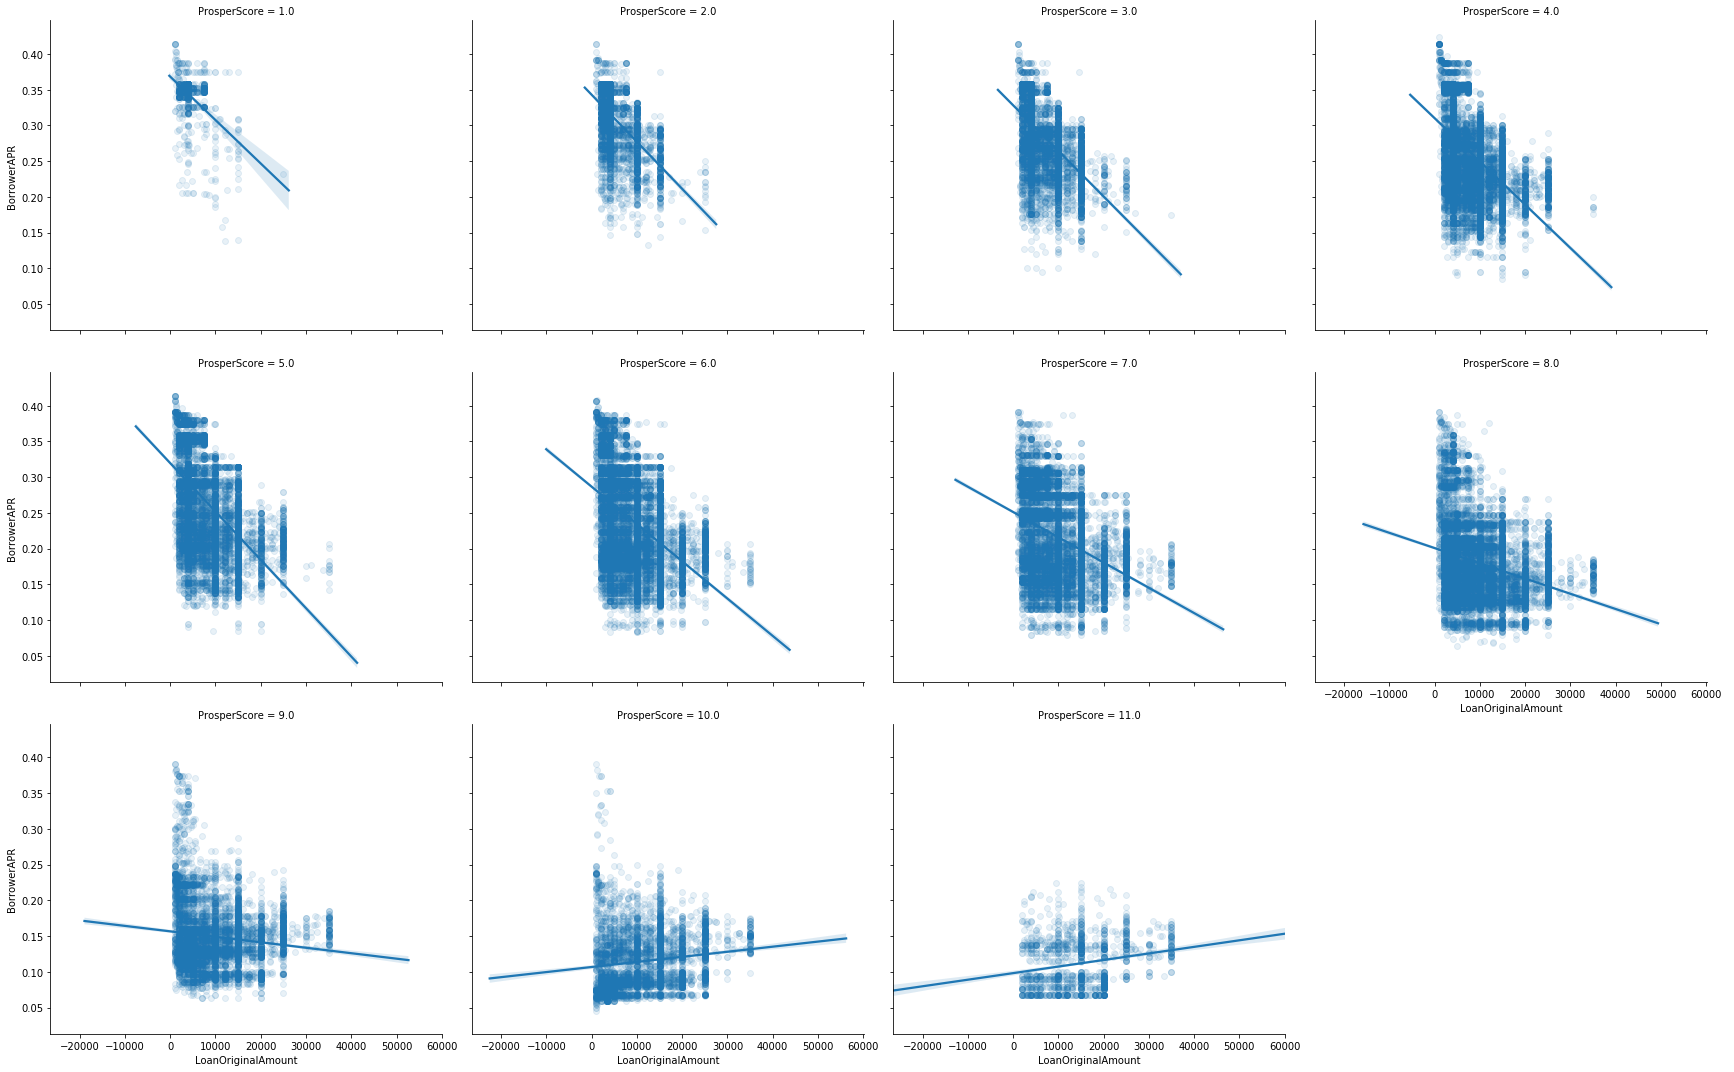

In [14]:
plt.figure(figsize = [15, 20])
g=sb.FacetGrid(data=loan_sub_df, aspect=1.2, height=5, col='ProsperScore', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();